In [97]:
import pandas as pd

df_epex = pd.read_csv('epex.csv')

In [98]:
df_epex

,Preis
0,0.00010
1,0.00010
2,0.00010
3,0.00010
4,0.00001
...,...
35035,0.06726
35036,0.03566
35037,0.03566
35038,0.03566


In [99]:
df_epex['Zeit'] = pd.date_range(start='2023-01-01', periods=len(df_epex), freq='15T')
df_epex['Tag'] = df_epex['Zeit'].dt.date
df_epex['Uhrzeit'] = df_epex['Zeit'].dt.time
df_epex['Wochentag'] = df_epex['Zeit'].dt.weekday

df_epex[:10]

/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/3984140710.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_epex['Zeit'] = pd.date_range(start='2023-01-01', periods=len(df_epex), freq='15T')


,Preis,Zeit,Tag,Uhrzeit,Wochentag
0,0.00010,2023-01-01 00:00:00,2023-01-01,00:00:00,6
1,0.00010,2023-01-01 00:15:00,2023-01-01,00:15:00,6
2,0.00010,2023-01-01 00:30:00,2023-01-01,00:30:00,6
3,0.00010,2023-01-01 00:45:00,2023-01-01,00:45:00,6
4,0.00001,2023-01-01 01:00:00,2023-01-01,01:00:00,6
5,0.00001,2023-01-01 01:15:00,2023-01-01,01:15:00,6
6,0.00001,2023-01-01 01:30:00,2023-01-01,01:30:00,6
7,0.00001,2023-01-01 01:45:00,2023-01-01,01:45:00,6
8,0.00000,2023-01-01 02:00:00,2023-01-01,02:00:00,6
9,0.00000,2023-01-01 02:15:00,2023-01-01,02:15:00,6


In [100]:
df_epex = df_epex[df_epex['Zeit'].dt.minute == 0]
df_epex['Tag'] = df_epex['Zeit'].dt.date
df_epex['Uhrzeit'] = df_epex['Zeit'].dt.time
df_epex['Wochentag'] = df_epex['Zeit'].dt.weekday

df_epex[:10]

/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/3629738570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epex['Tag'] = df_epex['Zeit'].dt.date
/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/3629738570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epex['Uhrzeit'] = df_epex['Zeit'].dt.time
/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/3629738570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Preis,Zeit,Tag,Uhrzeit,Wochentag
0,0.00010,2023-01-01 00:00:00,2023-01-01,00:00:00,6
4,0.00001,2023-01-01 01:00:00,2023-01-01,01:00:00,6
8,0.00000,2023-01-01 02:00:00,2023-01-01,02:00:00,6
12,-0.00001,2023-01-01 03:00:00,2023-01-01,03:00:00,6
16,-0.00003,2023-01-01 04:00:00,2023-01-01,04:00:00,6
20,-0.00002,2023-01-01 05:00:00,2023-01-01,05:00:00,6
24,-0.00005,2023-01-01 06:00:00,2023-01-01,06:00:00,6
28,-0.00002,2023-01-01 07:00:00,2023-01-01,07:00:00,6
32,0.00000,2023-01-01 08:00:00,2023-01-01,08:00:00,6
36,0.00004,2023-01-01 09:00:00,2023-01-01,09:00:00,6


In [101]:
df_epex = df_epex.set_index('Zeit').resample('5T').interpolate()
df_epex['Tag'] = df_epex.index.date
df_epex['Uhrzeit'] = df_epex.index.time
df_epex['Wochentag'] = df_epex.index.weekday

df_epex.reset_index(inplace=True)



/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/1200831611.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_epex = df_epex.set_index('Zeit').resample('5T').interpolate()
/var/folders/rm/s40xwy75637bjlwv1dqs81g40000gn/T/ipykernel_68140/1200831611.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_epex = df_epex.set_index('Zeit').resample('5T').interpolate()


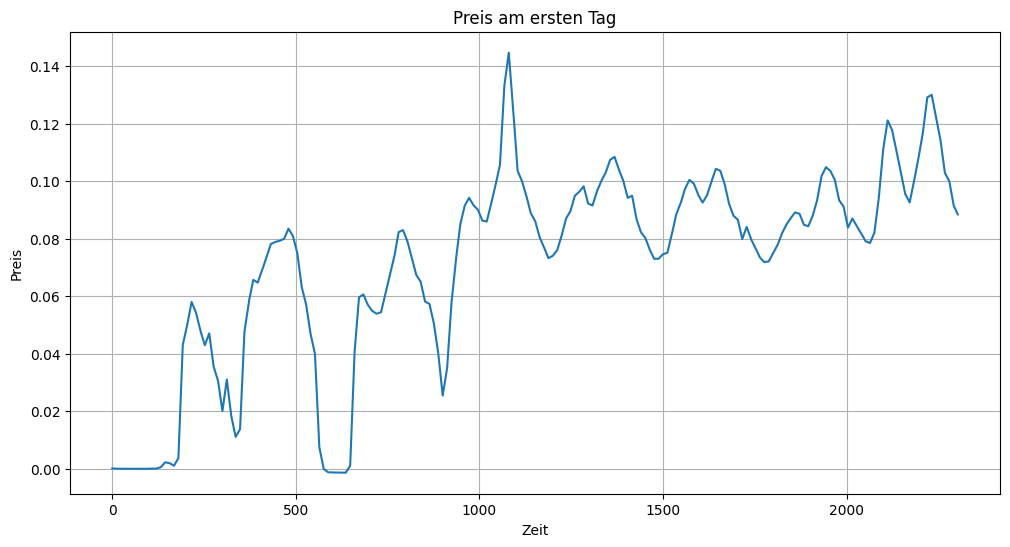

In [102]:
import matplotlib.pyplot as plt

# Filter the data for the first day
df_epex_filtered = df_epex[0:2304]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_epex_filtered['Preis'])
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.title('Preis am ersten Tag')
plt.grid(True)
plt.show()

In [103]:
df_epex_filtered

,Zeit,Preis,Tag,Uhrzeit,Wochentag
0,2023-01-01 00:00:00,0.000100,2023-01-01,00:00:00,6
1,2023-01-01 00:05:00,0.000092,2023-01-01,00:05:00,6
2,2023-01-01 00:10:00,0.000085,2023-01-01,00:10:00,6
3,2023-01-01 00:15:00,0.000077,2023-01-01,00:15:00,6
4,2023-01-01 00:20:00,0.000070,2023-01-01,00:20:00,6
...,...,...,...,...,...
2299,2023-01-08 23:35:00,0.089548,2023-01-08,23:35:00,6
2300,2023-01-08 23:40:00,0.089270,2023-01-08,23:40:00,6
2301,2023-01-08 23:45:00,0.088993,2023-01-08,23:45:00,6
2302,2023-01-08 23:50:00,0.088715,2023-01-08,23:50:00,6


In [104]:
df_epex.to_csv('epex_week.csv', index=False, sep=';', decimal=',')